In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### Data finding

In [38]:
filenames[0]

'2000Hz_Gap0mm1.txt'

In [44]:
DATA_DIR = "data"
filenames = os.listdir("data")
df_list = []
type_list = []
for filename in filenames:
    hz = filename.split("_")[0]
    gap_id = filename.split("_")[1]
    gap_type = gap_id[:4]
    welding_order = gap_id.split("mm")[-1].split(".")[0]
    
    type_list.append([hz, gap_type, welding_order])
    df_list.append(
        pd.read_csv(os.path.join(DATA_DIR, filename), delimiter="\t", header=None,
                   names =["time_order", "ampere", "volt"] ))

In [17]:
modifed_df_list = []
for df, (hz, gap_type)in zip(df_list, type_list):
    df["hz"] = hz
    df["gap_type"] = gap_type
    df["gap_type"] = gap_type
    
    welding_order
    modifed_df_list.append(df)
all_df = pd.concat(modifed_df_list).reset_index(drop=True)

In [18]:
all_df

,time_order,ampere,volt,hz,gap_type
0,2.15000,552.485,29.122,2000Hz,Gap0
1,2.15050,553.052,28.334,2000Hz,Gap0
2,2.15100,552.545,29.311,2000Hz,Gap0
3,2.15150,551.918,29.342,2000Hz,Gap0
4,2.15200,554.149,30.896,2000Hz,Gap0
...,...,...,...,...,...
1348931,69.55275,292.591,24.086,4000Hz,Gap4
1348932,69.55300,292.890,23.645,4000Hz,Gap4
1348933,69.55325,293.002,24.112,4000Hz,Gap4
1348934,69.55350,293.867,23.633,4000Hz,Gap4


### EDA and Data attribute

In [27]:
all_df = all_df.sort_values(["gap_type", "hz", "time_order"]).reset_index(drop=True)

In [5]:
all_df.dtypes

time_order    float64
ampere        float64
volt          float64
hz             object
gap_type       object
dtype: object

In [103]:
all_df.describe()

,time_order,ampere,volt
count,1.348936e+06,1.348936e+06,1.348936e+06
mean,4.001347e+01,2.724038e+02,2.612773e+01
std,2.190056e+01,4.139884e+01,3.668596e+00
min,0.000000e+00,-4.411500e+01,-4.348000e+00
25%,2.113619e+01,2.614200e+02,2.518400e+01
50%,3.987150e+01,2.741590e+02,2.618800e+01
75%,5.860650e+01,2.849050e+02,2.731400e+01
max,8.394000e+01,5.950520e+02,6.252600e+01


In [29]:
all_df.gap_type.value_counts() / len(all_df) * 100

Gap4    36.028544
Gap2    32.835657
Gap0    31.135799
Name: gap_type, dtype: float64

In [31]:
all_df.groupby(["hz", "gap_type"])[["ampere", "volt"]].mean()

ampere       volt
hz     gap_type                       
2000Hz Gap0      272.510996  26.200647
       Gap2      267.594743  25.238505
       Gap4      268.299282  26.590478
4000Hz Gap0      274.840464  26.114170
       Gap2      268.768232  26.556730
       Gap4      277.820695  25.904162

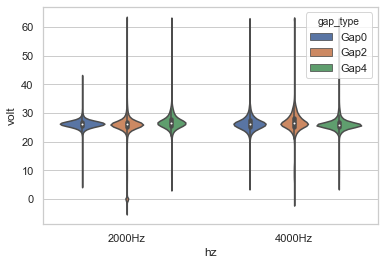

In [32]:
sns.violinplot(x="hz", y="volt", hue="gap_type", data=all_df)
plt.show()

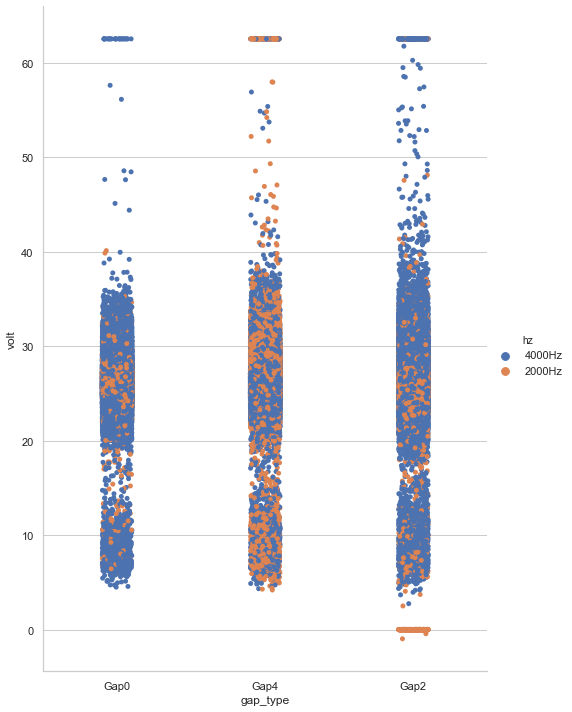

In [11]:
# sns.scatterplot(x="ampere", y="volt", data=all_df, hue="gap_type")

g = sns.catplot(x="gap_type", y="volt", hue="hz",
                 data=all_df.sample(frac=0.2, random_state=1),
                 height=10, aspect=.7);
plt.show()

C:\Users\sc82c\AppData\Local\conda\conda\envs\dsme\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


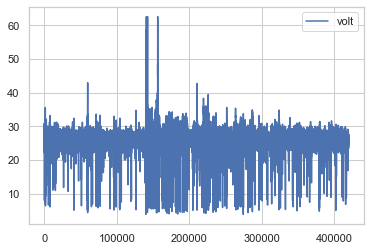

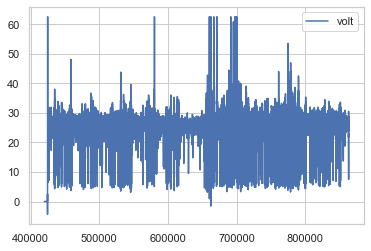

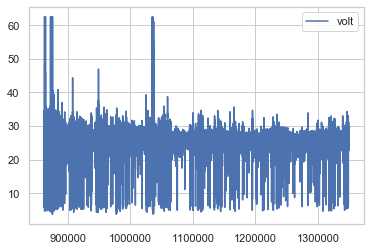

In [35]:
gap_types_cols = all_df.gap_type.unique().tolist()

for col_name in gap_types_cols:
    df = all_df[all_df["gap_type"] == col_name][["volt"]]
    ax = sns.lineplot(data=df)
    plt.show()


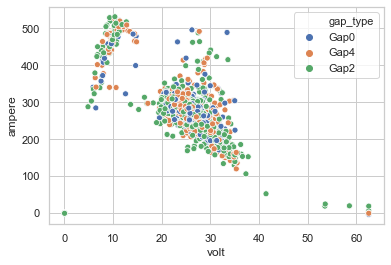

In [36]:
sns.scatterplot(x="volt", y="ampere", data=all_df.sample(frac=0.005, random_state=1), hue="gap_type")

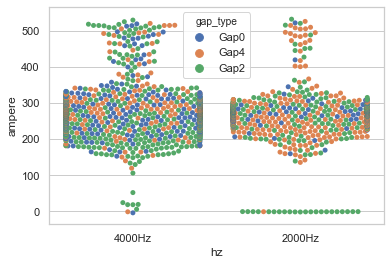

In [20]:
sns.swarmplot(x="hz", y="ampere", hue="gap_type", 
              data=all_df.sample(frac=0.005, random_state=1)
             )

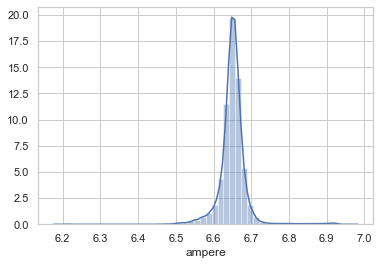

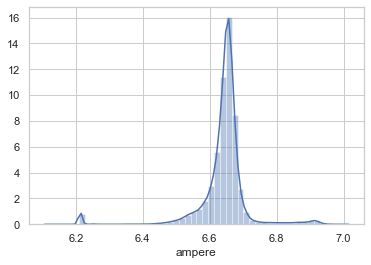

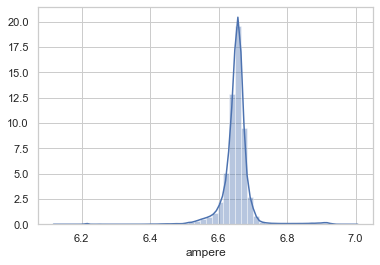

In [62]:
gap_types_cols = all_df.gap_type.unique().tolist()

for col_name in gap_types_cols:
    df = all_df[all_df["gap_type"] == col_name].ampere
    sns.distplot(
        np.log(df+500))
    plt.show()

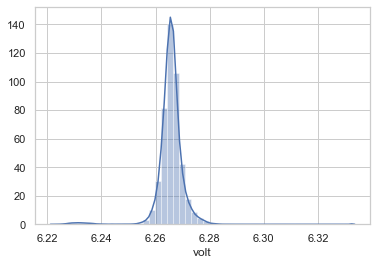

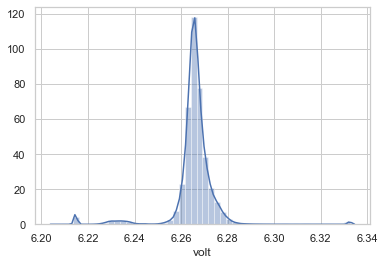

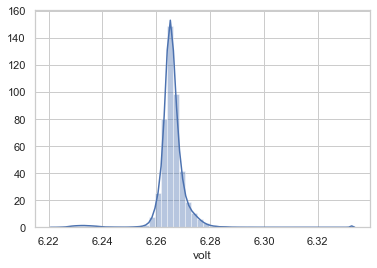

In [63]:
for col_name in gap_types_cols:
    df = all_df[all_df["gap_type"] == col_name].volt
    sns.distplot(
        np.log(df+500))
    plt.show()

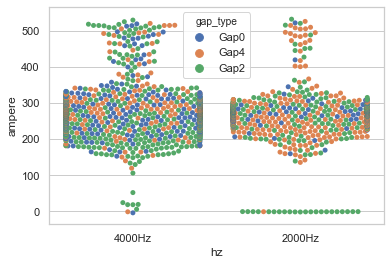

In [76]:
sns.swarmplot(x="hz", y="ampere", hue="gap_type", 
              data=all_df.sample(frac=0.005, random_state=1)
             )

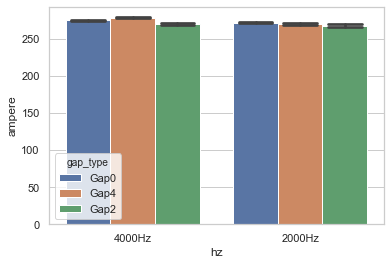

In [15]:
sns.barplot(x="hz", y="ampere", data=all_df.sample(frac=0.005, random_state=1), hue="gap_type", ci=68, capsize=.2)

In [ ]:
sns.barplot(x="hz", y="volt", hue="gap_type", data==all_df.sample(frac=0.005, random_state=1), ci=68, capsize=.2)

In [ ]:
ax = sns.lineplot(x="time_order", y="volt",
                   hue="gap_type", style="choice",
                   data=dots)

In [ ]:
ax = sns.lineplot(x="time_order", y="ampere",
                   hue="gap_type", style="choice",
                   data=dots)

### Logistic Regression


In [148]:
from sklearn.model_selection import train_test_split

X_df = all_df.copy()
X_df
X_df["hz"] = X_df.hz.replace({"2000Hz" : 0, "4000Hz" : 1})
X_df = X_df[['ampere', 'volt', 'hz']]
y_df = pd.get_dummies(all_df.gap_type)


X = X_df.values
y = y_df.values
X_dev, X_test, y_dev, y_test = train_test_split(X, y)


In [116]:
y_dev.sum(axis=0) / y_dev.sum() * 100

array([31.13228994, 32.82409247, 36.04361759])

y_test.sum(axis=0) / y_test.sum() * 100

In [129]:
np.argmax(y_val, axis=1)

array([1, 2, 2, ..., 0, 1, 1], dtype=int64)

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

In [144]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(1)

    clf = LogisticRegression()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))

In [145]:
np.mean(result_train), np.mean(result_val)

(0.3806550743203038, 0.3806269039697461)

In [146]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(5)

    clf = LogisticRegression()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))

In [147]:
np.mean(result_train), np.mean(result_val)

(0.37071934225690967, 0.370720824906939)

In [154]:
from sklearn.model_selection import train_test_split

X_df = all_df.copy()
X_df
X_df["hz"] = X_df.hz.replace({"2000Hz" : 0, "4000Hz" : 1})
X_df = X_df[['ampere', 'volt', 'hz']]
X_df["log_am"] = np.log(X_df['ampere'] + 100)
X_df["log_volt"] = np.log(X_df['volt'] + 100)
y_df = pd.get_dummies(all_df.gap_type)


X = X_df.values
y = y_df.values
X_dev, X_test, y_dev, y_test = train_test_split(X, y)

In [155]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(1)

    clf = LogisticRegression()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.3800758523755019, 0.38029775566322893)

In [156]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(5)

    clf = LogisticRegression()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.3787642013161978, 0.37886057356810604)

In [ ]:
ㅁ

In [10]:
X_df = all_df.copy()

shift_big_list = []
rolling_big_list = []
# window_size = 11
window_size = 11

for hz in ["2000Hz", "4000Hz"]:
    for gap_type in ["Gap0", "Gap0", "Gap4"]:
        target_df = X_df[(X_df["hz"] == hz) & (X_df["gap_type"] == gap_type)][['ampere', 'volt']]
        shift_small_list = []
        rolling_small_list = []
        for i in range(1, window_size):
            names = target_df.columns
            df = target_df.shift(i)
            df.columns = [name + "_shift_" + str(i) for name in names]
            shift_small_list.append(df)

            af = target_df.rolling(i).mean()
            af.columns = [name + "_rolling_" + str(i) for name in names]
            rolling_small_list.append(af)

        shift_big_list.append(pd.concat(shift_small_list, axis=1))
        rolling_big_list.append(pd.concat(rolling_small_list, axis=1))
        

X_df = pd.merge(X_df, pd.concat(shift_big_list).dropna(), how="inner" , left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.concat(rolling_big_list).dropna(), how="inner" , left_index=True, right_index=True)

y_df = pd.get_dummies(X_df.gap_type)

X_df["hz"] = X_df.hz.replace({"2000Hz" : 0, "4000Hz" : 1})
X_df = X_df[['ampere', 'volt', 'hz']]
X_df["log_am"] = np.log(X_df['ampere'] + 100)
X_df["log_volt"] = np.log(X_df['volt'] + 100)


X = X_df.values
y = y_df.values
X_dev, X_test, y_dev, y_test = train_test_split(X, y)

In [11]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(1)

    clf = LogisticRegression()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.7757363804316176, 0.7757363803158119)

In [12]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

from sklearn.naive_bayes import GaussianNB
 
for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(5)

    clf = GaussianNB()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.7654297009065143, 0.7653684485064117)

In [13]:
from sklearn.neural_network import MLPClassifier

kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(1)

    clf = MLPClassifier(hidden_layer_sizes=(32,16))
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.7809763658776167, 0.7809985275984435)

In [14]:
kf = KFold(n_splits=3, shuffle=True)
result_val = []
result_train = []

from sklearn.ensemble import RandomForestClassifier 
 
for train_idx, val_idx in kf.split(X_dev):
    X_train = X_dev[train_idx, :]
    X_val = X_dev[val_idx, :]
    y_train = y_dev[train_idx]
    y_val = y_dev[val_idx]
    
    poly = PolynomialFeatures(1)

    clf = RandomForestClassifier()
    X_train = poly.fit_transform(X_train)
    clf.fit(X_train, np.argmax(y_train, axis=1)) 

    X_val = poly.fit_transform(X_val)
    y_pred = clf.predict(X_val)
    y_true =  np.argmax(y_val, axis=1)
    result_val.append(accuracy_score(y_pred, y_true))

    y_pred = clf.predict(X_train)
    y_true = np.argmax(y_train, axis=1)
    result_train.append(accuracy_score(y_pred, y_true))
np.mean(result_train), np.mean(result_val)

(0.976711244300868, 0.8177301364033392)